<a href="https://colab.research.google.com/github/lucasxavila/SmartAgentStateMachine/blob/main/melhoradoSmartAgentStateMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Tentativas restantes: 5
Digite um número: 5
O número é menor. Tente novamente.

Tentativas restantes: 4
Digite um número: 15
O número é menor. Tente novamente.

Tentativas restantes: 3
Digite um número: 2

Parabéns! Você acertou o número.

Tentativas realizadas: 3

Histórico de tentativas: [5, 15, 2]


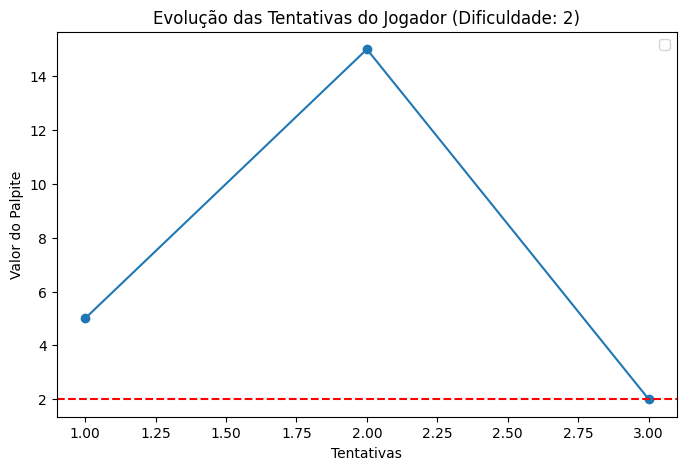

In [8]:
!pip install matplotlib
!pip install mplcursors

from IPython.display import clear_output
import random
import matplotlib.pyplot as plt

clear_output()

def plot_attempts_interactive(agent):
  plt.figure(figsize=(8,5))
  plt.plot(range(1, len(agent.history) + 1), agent.history, marker='o', linestyle='-')
  plt.axhline(y=agent.secret_number, color='r', linestyle='--', label="Número Secreto")
  plt.xlabel("Tentativas")
  plt.ylabel("Valor do Palpite")
  plt.title(f"Evolução das Tentativas do Jogador (Dificuldade: {difficulty})")
  plt.legend("")
  plt.show()

while True:
  print(f"1: Fácil\n2: Médio\n3: Difícil")
  difficulty = int(input("Escolha a dificuldade desejada: "))

  if difficulty == 1 or difficulty == 2 or difficulty == 3:
    break
  else:
    clear_output()
    print("Alternativa inválida! Tente novamente.")

class GameAgent:
  def __init__(self, secret_number, difficulty):
    self.secret_number = secret_number

    if difficulty == 1:
      self.max_attempts = 7
    elif difficulty == 2:
      self.max_attempts = 5
    else:
      self.max_attempts = 3

    self.attempts = 0
    self.state = "Esperando tentativa"
    self.history = [] # Histórico de tentativas

  def make_guess(self, guess):
    self.attempts += 1
    self.history.append(guess)

    if guess == self.secret_number:
      self.state = "Acertou!"
      return f"\nParabéns! Você acertou o número.\n\nTentativas realizadas: {agent.attempts}\n"
    elif self.attempts >= self.max_attempts:
      self.state = "Fim do jogo"
      return f"\nGame over! O número era {self.secret_number}."
    elif guess < self.secret_number:
      self.state = "Tentativa errada (muito baixo)"
      return "O número é maior. Tente novamente."
    else:
      self.state = "Tentativa errada (muito alto)"
      return "O número é menor. Tente novamente."

# Criando um agente com um número secreto entre
agent = GameAgent(secret_number=random.randint(1, 100), difficulty=difficulty)

clear_output()

while agent.state not in ["Acertou!", "Fim do jogo"]:
  print(f"\nTentativas restantes: {agent.max_attempts - agent.attempts}")
  while True:
    try:
      guess = int(input("Digite um número: "))

      if 1 <= guess <= 100:
        break
      else:
        print("Número inválido! Insira um número entre 1 e 100.")

    except ValueError:
      print("Insira um número válido.")
  print(agent.make_guess(guess))

print(f"Histórico de tentativas: {agent.history}")
plot_attempts_interactive(agent)